In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [17]:
df = pd.read_csv('south-korean-pollution-data.csv')
df.head()

,Unnamed: 0,date,pm25,pm10,o3,no2,so2,co,Lat,Long,City,District,Country
0,0,2022/2/1,112,31,35,2,1,4,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea
1,1,2022/2/2,92,21,35,2,1,0,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea
2,2,2022/2/3,60,20,35,1,1,4,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea
3,3,2022/2/4,51,27,33,1,1,4,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea
4,4,2022/2/5,57,24,27,2,1,5,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea


In [18]:
new_df = df.drop(columns=['pm10', 'Unnamed: 0','date','City','District', 'Country'])
new_df.head()


,pm25,o3,no2,so2,co,Lat,Long
0,112,35,2,1,4,38.2089,127.9495
1,92,35,2,1,0,38.2089,127.9495
2,60,35,1,1,4,38.2089,127.9495
3,51,33,1,1,4,38.2089,127.9495
4,57,27,2,1,5,38.2089,127.9495


In [19]:
new_df.describe()

,pm25,o3,no2,so2,co,Lat,Long
count,34530.000000,34530.000000,34530.000000,34530.000000,34530.000000,34530.000000,34530.000000
mean,53.224616,34.506371,14.802114,3.553084,4.548422,37.022716,127.247759
std,39.952008,17.393329,11.479781,2.963608,2.966530,0.919155,0.613795
min,0.000000,0.000000,0.000000,0.000000,0.000000,35.059900,126.138700
25%,20.000000,23.000000,6.000000,2.000000,3.000000,36.410900,126.896900
50%,55.000000,32.000000,12.000000,3.000000,4.000000,37.132400,127.059200
75%,78.000000,43.000000,21.000000,5.000000,6.000000,37.757700,127.716100
max,220.000000,152.000000,85.000000,110.000000,281.000000,38.208900,130.821700


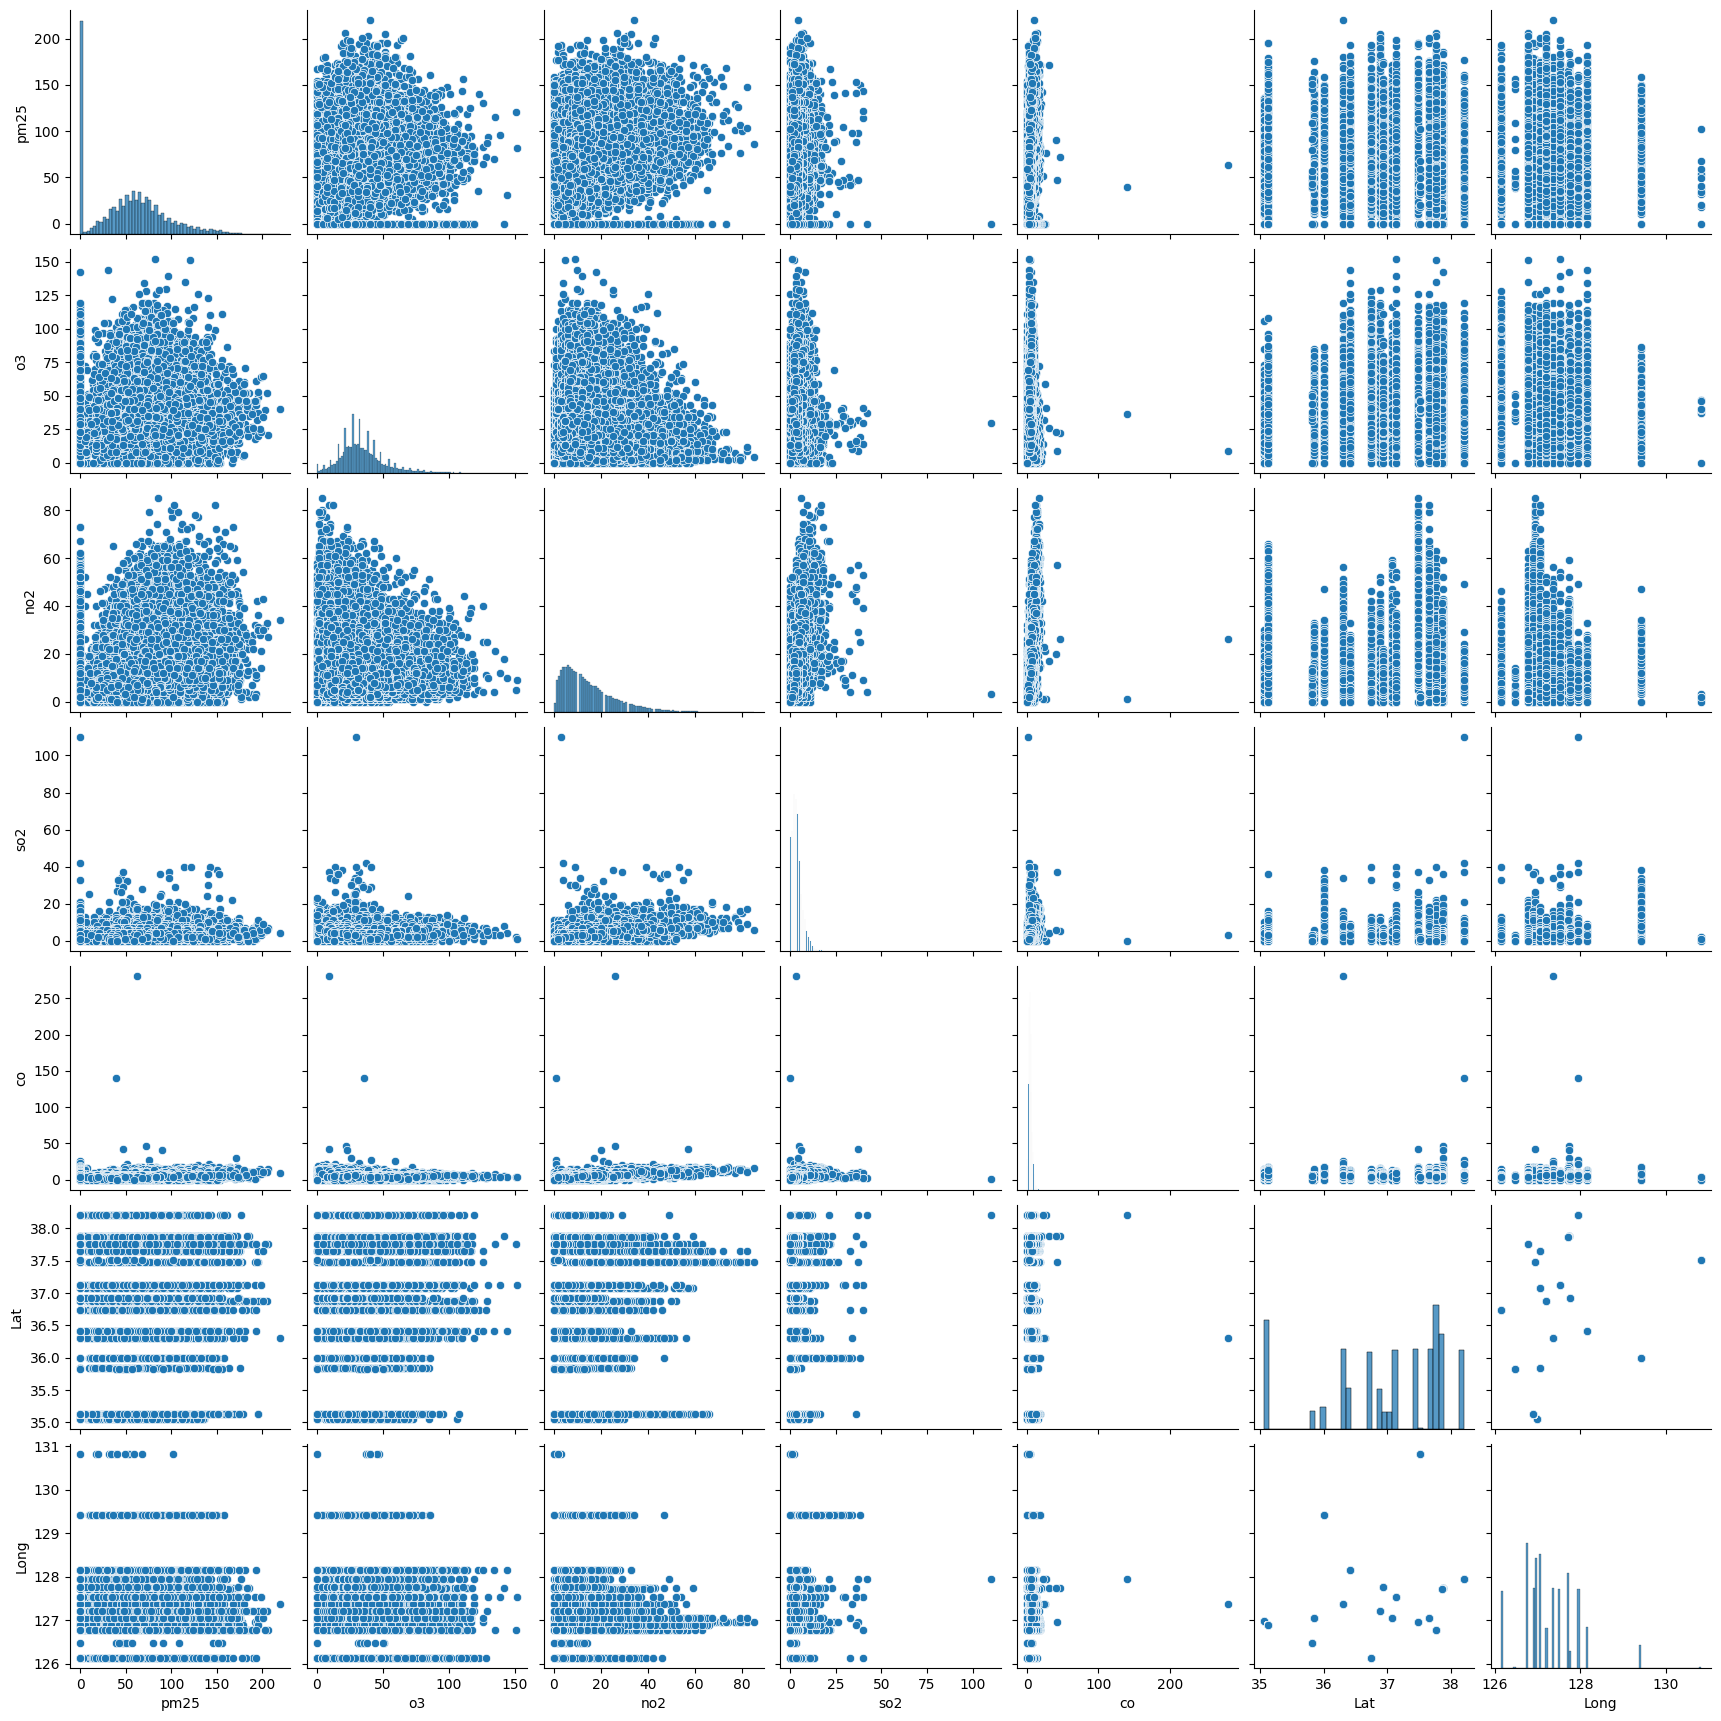

In [20]:
sns.pairplot(new_df)

<AxesSubplot:>

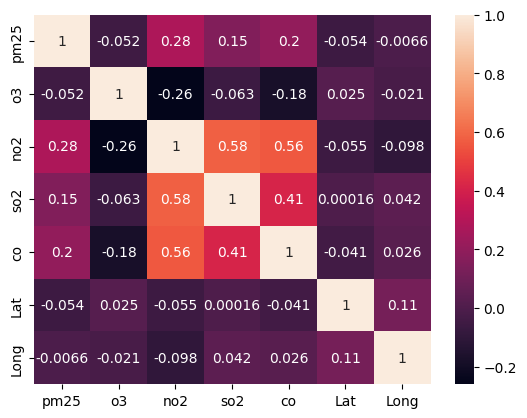

In [21]:
sns.heatmap(new_df.corr(), annot=True)

In [22]:
Y = new_df.pm25
Y

0        112
1         92
2         60
3         51
4         57
        ... 
34525     49
34526    102
34527     59
34528     41
34529      0
Name: pm25, Length: 34530, dtype: int64

In [23]:
X = new_df.drop(["pm25",'Lat','Long','so2','co'], axis=1)
X

,o3,no2
0,35,2
1,35,2
2,35,1
3,33,1
4,27,2
...,...,...
34525,46,3
34526,39,2
34527,40,2
34528,0,0


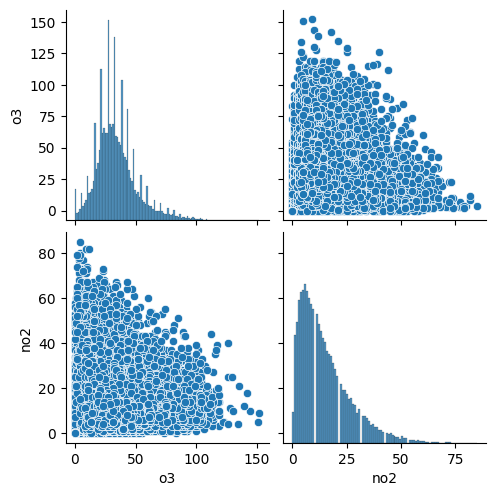

In [24]:
sns.pairplot(X)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [26]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

model = linear_model.LinearRegression()

In [27]:
model.fit(X_train, Y_train)

LinearRegression()

In [28]:
Y_pred = model.predict(X_test)

In [29]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [0.04683075 0.99881281]
Intercept: 36.81408810508466
Mean squared error (MSE): 1483.44
Coefficient of determination (R^2): 0.08


/home/kdell1/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pm25'>

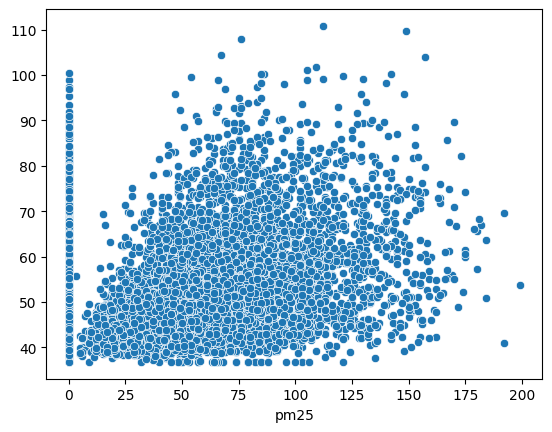

In [30]:
sns.scatterplot(Y_test, Y_pred)